In [9]:
import pandas as pd 
df=pd.read_csv('aapl_us_2025.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
df_trimmed = df[(df['Date'] >= '2000-01-01') & (df['Date'] <= '2025-12-31')]
print(df_trimmed.head())




           Date      Open      High       Low     Close        Volume
3871 2000-01-03  0.790727  0.847915  0.766628  0.843766  6.344730e+08
3872 2000-01-04  0.816211  0.834185  0.763074  0.772753  6.067407e+08
3873 2000-01-05  0.782234  0.833594  0.776506  0.784013  9.216628e+08
3874 2000-01-06  0.800210  0.806827  0.716259  0.716259  9.094082e+08
3875 2000-01-07  0.727418  0.761494  0.720209  0.750529  5.455865e+08


Model saved successfully as apple_stock_model.pkl
Mean Squared Error: 0.2449359421820224
R² Score: 0.9999358917644854


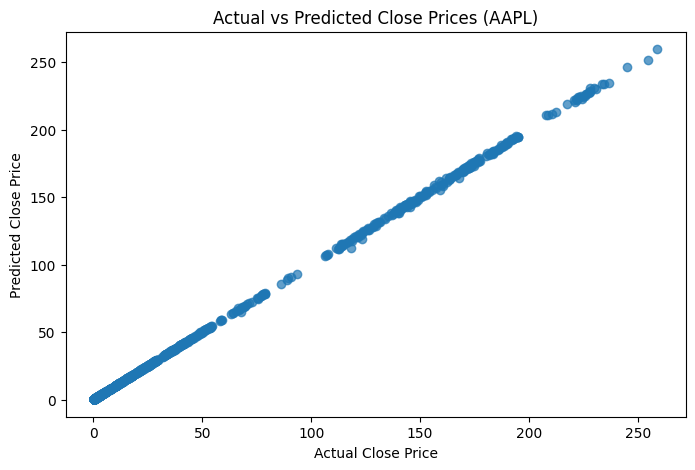

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
df = pd.read_csv('aapl_us_2025.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'] >= '2000-01-01') & (df['Date'] <= '2025-12-31')]
df = df.sort_values(by='Date')
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
with open('apple_stock_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as apple_stock_model.pkl")
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices (AAPL)")
plt.show()
